In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sp
from datetime import datetime, timedelta

In [2]:
customer_df = pd.read_csv('../database/customer.csv', index_col='customer_id')
customer_df.head()

,first_name,last_name,gender,phone,email
customer_id,,,,,
1,Stanisław,Puchalski,male,451491634,Stanislaw.Puc@interia.pl
2,Inga,Wysocka,female,782370041,Wysocka.In@wp.pl
3,Leon,Stasik,male,603017148,Leon8885@gmail.com
4,Magdalena,Szkurłat,female,454919744,Szkurlat.Ma@wp.pl
5,Oskar,Pilot,male,457698695,OskarPilot@onet.pl


In [3]:
staff_df = pd.read_csv('../database/staff.csv', index_col='staff_id')
staff_df.head()

,first_name,last_name,gender,phone,email,salary
staff_id,,,,,,
1,Miłosz,Wojnicki,male,531439257,Milosz.Wojnicki@dragons.com,5140.0
2,Nikodem,Pilarz,male,733245438,Nikodem.Pilarz@dragons.com,4310.0
3,Jan,Błotny,male,571731374,Jan.Blotny@dragons.com,5140.0
4,Bartosz,Hetman,male,787450473,Bartosz.Hetman@dragons.com,5140.0
5,Zuzanna,Brzozowska,female,784416191,Zuzanna.Brzozowska@dragons.com,5140.0


In [4]:
games_df = pd.read_csv('../database/games_for_sale.csv', index_col='game_id')
games_df.head()

,names,description,min_players,max_players,avg_time,year,avg_rating,age,mechanic,owned,category,price
game_id,,,,,,,,,,,,
174430,Gloomhaven,Vanquish monsters with strategic cardplay. Ful...,1,4,120,2017,8.98893,12,"Action / Movement Programming, Co-operative Pl...",25928,"Adventure, Exploration, Fantasy, Fighting, Min...",692.55
161936,Pandemic Legacy: Season 1,Mutating diseases are spreading around the wor...,2,4,60,2015,8.66140,13,"Action Point Allowance System, Co-operative Pl...",41605,"Environmental, Medical",270.35
182028,Through the Ages: A New Story of Civilization,Rewrite history as you build up your civilizat...,2,4,240,2015,8.60673,14,"Action Point Allowance System, Auction/Bidding...",15848,"Card Game, Civilization, Economic",293.84
167791,Terraforming Mars,Compete with rival CEOs to make Mars habitable...,1,5,120,2016,8.38461,12,"Card Drafting, Hand Management, Set Collection...",33340,"Economic, Environmental, Industry / Manufactur...",350.40
12333,Twilight Struggle,Relive the Cold War and rewrite history in an ...,2,2,180,2005,8.33954,13,"Area Control / Area Influence, Campaign / Batt...",42952,"Modern Warfare, Political, Wargame",243.98


In [58]:
items_df = pd.read_csv('../database/games_to_rent.csv', index_col='item_id')
items_df.head()

,game_id,min_players,max_players,rent_price
item_id,,,,
1,174430,1,4,10
2,174430,1,4,10
3,174430,1,4,10
4,174430,1,4,10
5,174430,1,4,10


In [4]:
dates_df = pd.read_csv('dates.csv')
dates = np.array(dates_df.date)
dates

array(['2021-06-01', '2021-06-02', '2021-06-04', '2021-06-07',
       '2021-06-08', '2021-06-09', '2021-06-10', '2021-06-11',
       '2021-06-14', '2021-06-15', '2021-06-16', '2021-06-17',
       '2021-06-18', '2021-06-21', '2021-06-22', '2021-06-23',
       '2021-06-24', '2021-06-25', '2021-06-28', '2021-06-29',
       '2021-06-30', '2021-07-01', '2021-07-02', '2021-07-05',
       '2021-07-06', '2021-07-07', '2021-07-08', '2021-07-09',
       '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15',
       '2021-07-16', '2021-07-19', '2021-07-20', '2021-07-21',
       '2021-07-22', '2021-07-23', '2021-07-26', '2021-07-27',
       '2021-07-28', '2021-07-29', '2021-07-30', '2021-08-02',
       '2021-08-03', '2021-08-04', '2021-08-05', '2021-08-06',
       '2021-08-09', '2021-08-10', '2021-08-11', '2021-08-12',
       '2021-08-13', '2021-08-16', '2021-08-17', '2021-08-18',
       '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
       '2021-08-25', '2021-08-26', '2021-08-27', '2021-

In [6]:
ranks = np.array(range(1, len(dates) + 1))
date_prob = ranks / sum(ranks)
sum(date_prob)

0.9999999999999999

# SALE

In [7]:
size = len(dates) * 231

customer_id = np.random.choice(customer_df.index, size=size, replace=True)
staff_id = np.random.choice(staff_df.index, size=size, replace=True)
date = np.random.choice(dates, size=size, replace=True, p=date_prob)

days = []
for day in date:
    td = datetime.today() - datetime.strptime(day, '%Y-%m-%d')
    days.append(td.days)
days = np.array(days)

game = games_df.sample(size, replace=True, weights=games_df.avg_rating)
game_id = np.array(game.index)
price = np.array(game.price)
amount = price + np.round(np.vectorize(sp.expon.rvs)(0, np.log(days)))

sale = pd.DataFrame()
sale["customer_id"] = customer_id
sale["staff_id"] = staff_id
sale["game_id"] = game_id
sale["amount"] = amount
sale["date"] = date

sale = sale.sort_values('date')
sale['sale_id'] = list(range(1, size + 1))
sale = sale.set_index('sale_id')

nulls = pd.DataFrame()
nulls['null'] = sp.binom.rvs(1, 0.17, size=size)
null_ind = nulls[nulls.null == 0].index
sale.customer_id.iloc[null_ind] = pd.NA

sale

<ipython-input-7-7c08aadf918c>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale.customer_id.iloc[null_ind] = pd.NA


,customer_id,staff_id,game_id,amount,date
sale_id,,,,,
1,NaN,8,17394,602.40,2021-06-01
2,NaN,8,155624,187.72,2021-06-04
3,NaN,9,121408,212.36,2021-06-04
4,289.0,3,129122,229.00,2021-06-04
5,NaN,5,36932,223.96,2021-06-07
...,...,...,...,...,...
117806,NaN,4,310,67.60,2023-06-05
117807,NaN,12,172737,336.00,2023-06-05
117808,NaN,13,10226,643.80,2023-06-05


In [515]:
sale.to_csv('../database/sale.csv')

# RENTAL

In [86]:
size = len(dates) * 21 + 3

customer_id = np.random.choice(customer_df.index, size=size, replace=True)
staff_id = np.random.choice(staff_df.index, size=size, replace=True)
rental_date = np.random.choice(dates, size=size, replace=True, p=date_prob)

return_date = []
days = sp.poisson.rvs(1.78, size=size) + 1
for date, day in zip(rental_date, days):
    return_date.append(datetime.strptime(date, '%Y-%m-%d') + timedelta(days=int(day)))

unic_id = items_df.game_id.drop_duplicates()
games_items_df = games_df.join(unic_id, on="game_id", how="inner")
game_id = games_items_df.sample(size, replace=True, weights=games_items_df.avg_rating).game_id
item_id = []
for g_id in game_id:
    i_id = np.random.choice(items_df[items_df.game_id == g_id].index)
    item_id.append(i_id)

rental = pd.DataFrame()
rental["customer_id"] = customer_id
rental["staff_id"] = staff_id
rental["item_id"] = item_id
rental["rental_date"] = rental_date
rental["return_date"] = return_date

rental = rental.sort_values('rental_date')
rental['rental_id'] = list(range(1, size + 1))
rental = rental.set_index('rental_id')

rental

,customer_id,staff_id,item_id,rental_date,return_date
rental_id,,,,,
1,102,14,1198,2021-06-08,2021-06-09
2,1210,3,6431,2021-06-09,2021-06-13
3,1100,15,3046,2021-06-11,2021-06-19
4,862,12,5677,2021-06-11,2021-06-12
5,739,2,772,2021-06-14,2021-06-17
...,...,...,...,...,...
10709,617,2,6256,2023-06-05,2023-06-07
10710,924,17,74,2023-06-05,2023-06-07
10711,1136,12,3307,2023-06-05,2023-06-07


In [87]:
rental.to_csv('../database/rental.csv')

# ANALIZA

In [6]:
games_for_sale = pd.read_csv('../database/games_for_sale.csv')
games_for_sale.head()

,game_id,name,description,min_players,max_players,avg_time,avg_rating,age,availability,category,price,rent_price
0,174430,Gloomhaven,Vanquish monsters with strategic cardplay. Ful...,1,4,120,8.98893,12,25928,"Adventure, Exploration, Fantasy, Fighting, Min...",692.55,10
1,161936,Pandemic Legacy: Season 1,Mutating diseases are spreading around the wor...,2,4,60,8.66140,13,41605,"Environmental, Medical",270.35,5
2,182028,Through the Ages: A New Story of Civilization,Rewrite history as you build up your civilizat...,2,4,240,8.60673,14,15848,"Card Game, Civilization, Economic",293.84,5
3,167791,Terraforming Mars,Compete with rival CEOs to make Mars habitable...,1,5,120,8.38461,12,33340,"Economic, Environmental, Industry / Manufactur...",350.40,5
4,12333,Twilight Struggle,Relive the Cold War and rewrite history in an ...,2,2,180,8.33954,13,42952,"Modern Warfare, Political, Wargame",243.98,5


In [14]:
from sqlalchemy import create_engine, text
from urllib.parse import quote

username = 'team25'
password = quote('te@mzs')
database = 'team25'
host = 'giniewicz.it'
port = '3306'

engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')

connection = engine.connect()

sql = """
select s.game_id, g.name, g.avg_rating, g.price, count(*) as sale_count
from sale s
join games_for_sale g
  on s.game_id = g.game_id
where s.date > date_add(sysdate(), interval -12 month)
group by s.game_id, g.name, g.avg_rating, g.price
order by sale_count desc
"""

result = connection.execute(text(sql))

game_sale = pd.DataFrame(result.fetchall(), columns=result.keys())

connection.close()
game_sale

,game_id,name,avg_rating,price,sale_count
0,150997,Shadows of Brimstone: Swamps of Death,8.08270,354.98,45
1,196496,Warfighter: The WWII Tactical Combat Card Game,7.92137,541.68,42
2,172737,High Frontier (3rd edition),8.57038,333.00,41
3,146021,Eldritch Horror,7.91310,295.39,41
4,233371,Clank! In! Space!,8.01024,436.59,41
...,...,...,...,...,...
3718,6281,Eketorp,6.36757,133.20,10
3719,163027,Loop Inc.,6.50048,39.96,10
3720,1552,Illuminati: New World Order,6.36824,333.00,10
3721,177702,Warehouse 51,6.31327,25.04,9


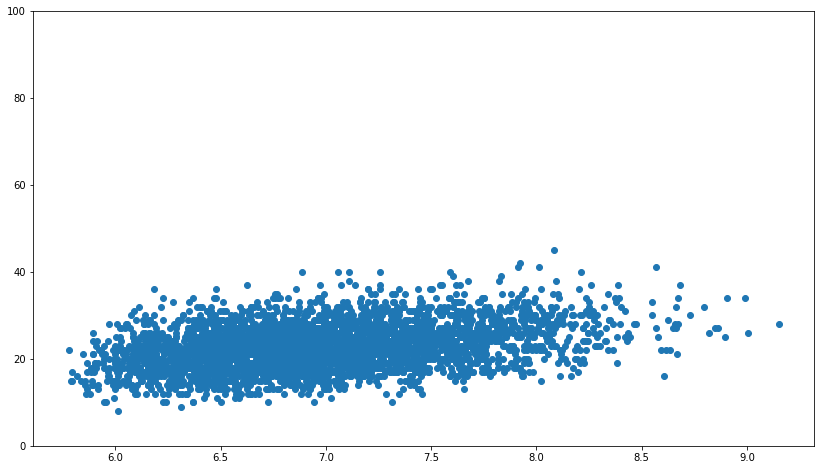

In [17]:
plt.figure(figsize=(14, 8))
plt.scatter(game_sale.avg_rating, game_sale.sale_count)
plt.ylim(0, 100)
plt.show()

In [27]:
round(np.corrcoef(game_sale.avg_rating, game_sale.sale_count)[0, 1], 2)

0.37

In [30]:
round(sp.spearmanr(game_sale.avg_rating, game_sale.sale_count)[0], 2)

0.36

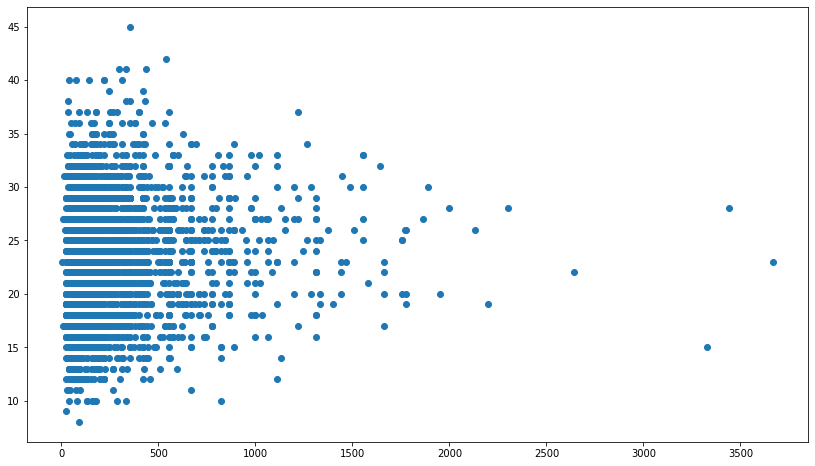

In [15]:
plt.figure(figsize=(14, 8))
plt.scatter(game_sale.price, game_sale.sale_count)
plt.show()

In [16]:
np.corrcoef(game_sale.price, game_sale.sale_count)[0, 1]

0.1137457320992753

In [26]:
str(datetime.today().date())

'2023-06-21'